In [1]:
# For data visualization
!pip install matplotlib seaborn
!pip install seaborn

# For machine learning models and preprocessing
!pip install scikit-learn

# For XGBoost (if needed)
!pip install xgboost


In [2]:
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# XGBoost Classifier (if you need it)
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# load dataset
df = pd.read_csv(r"C:\Users\USER\Customer-Churn - Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Initialization
encoder = LabelEncoder()


In [7]:
# Step 1: Select only categorical columns
categorical_data = df.select_dtypes(include=['object']).copy()

# Display the selected categorical data
print(categorical_data.head())




   customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No 

In [8]:
# Step 2: Apply Label Encoding 
label_encoder = LabelEncoder()
for col in categorical_data.columns:
    df[col] = encoder.fit_transform(df[col])



In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [10]:
target = df["Churn"]

In [11]:
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [12]:
features = df.drop(["Churn", "customerID"], axis =1)

In [13]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [14]:
print(features.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64


In [15]:
features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [16]:
# Fill NaNs with the mean
features.fillna(features.mean(), inplace=True)

In [17]:
print(features.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


# Exploratory Data Analysis (EDA)
## Visualize Relationships:

### Identify key variables (e.g., Tenure, MonthlyCharges, TotalCharges, Contract) and visualize their relationships with the target variable (Churn).

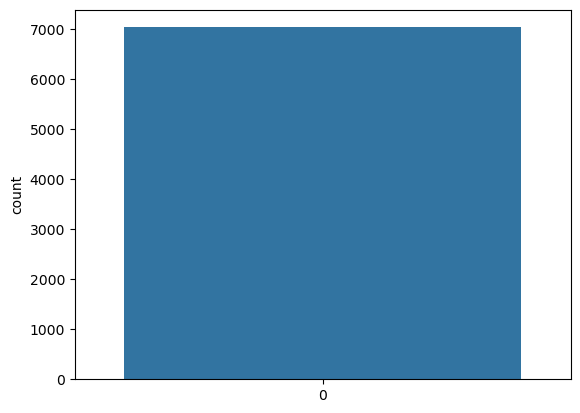

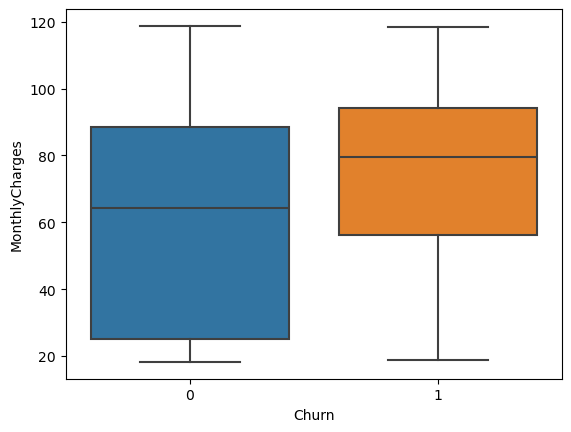

In [19]:
sns.countplot(df['Churn'])
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


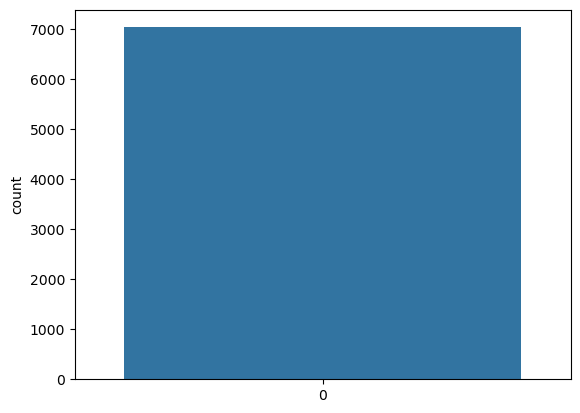

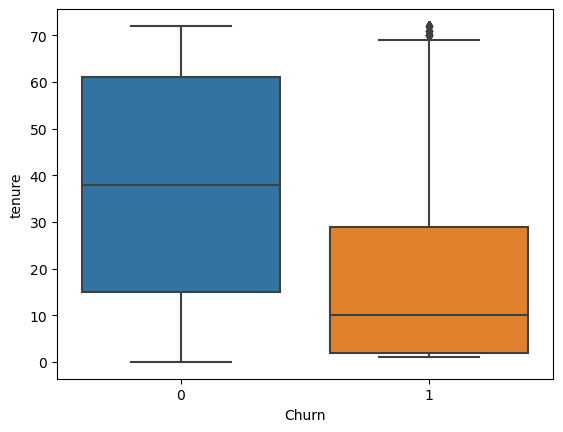

In [20]:
sns.countplot(df['Churn'])
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

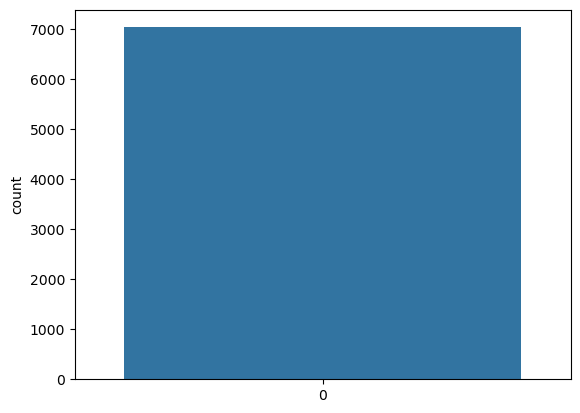

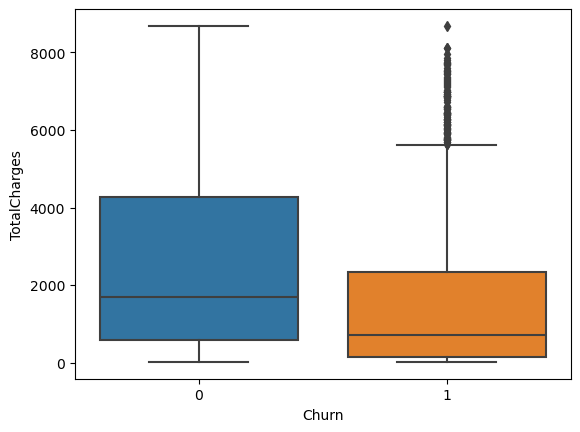

In [21]:
sns.countplot(df['Churn'])
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.show()

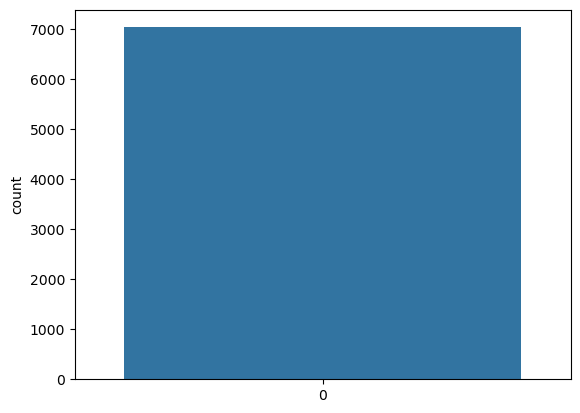

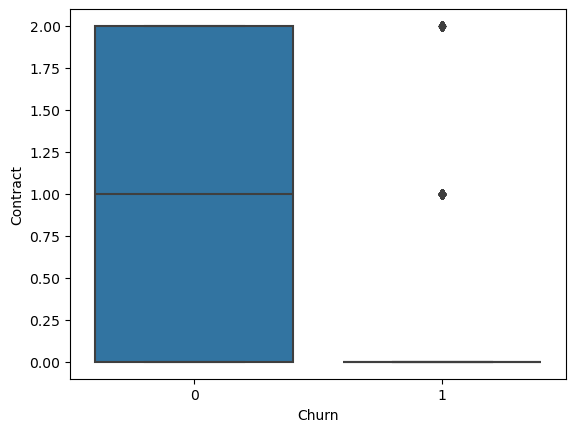

In [22]:
sns.countplot(df['Churn'])
plt.show()

sns.boxplot(x='Churn', y='Contract', data=df)
plt.show()

## Explore Correlations:

### Using a correlation matrix to see if there are any strong relationships between numeric features.

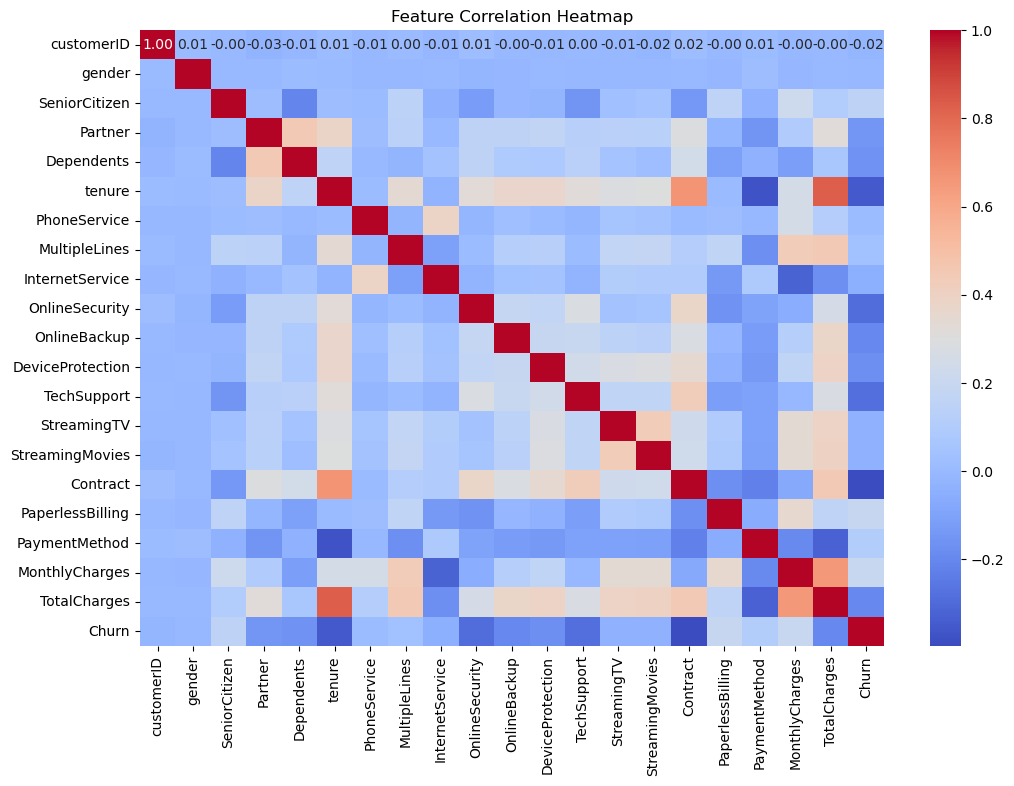

In [24]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#plt.show()


# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()




## univarite Analysis

<Axes: xlabel='TotalCharges'>

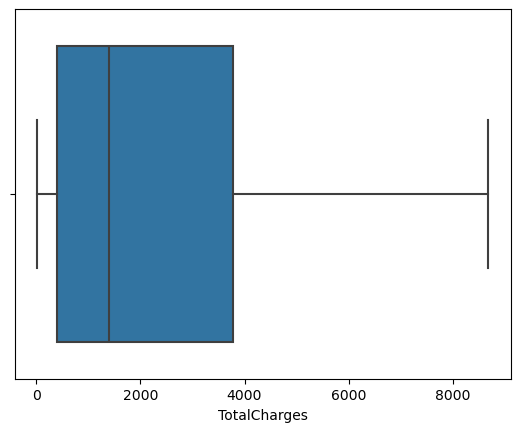

In [27]:
# check for outliers
sns.boxplot(x=features["TotalCharges"])

<Axes: xlabel='MonthlyCharges'>

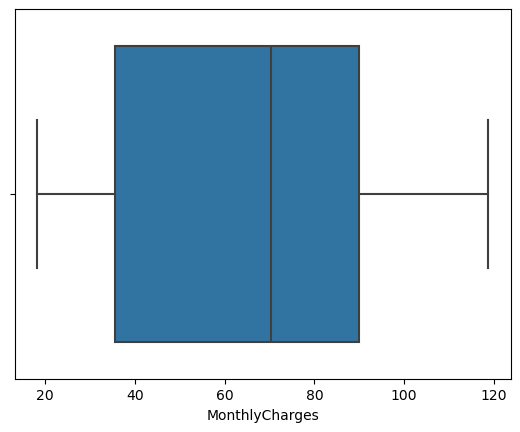

In [28]:
# check for outliers
sns.boxplot(x=features["MonthlyCharges"])

<Axes: xlabel='tenure'>

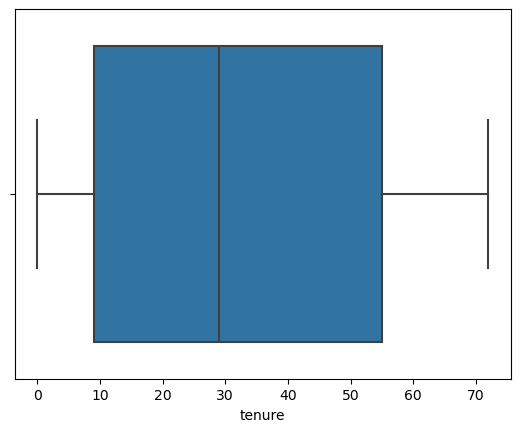

In [29]:
# check for outliers
sns.boxplot(x=features["tenure"])

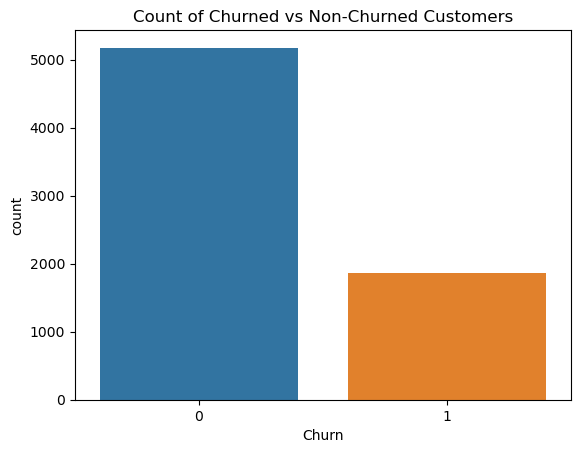

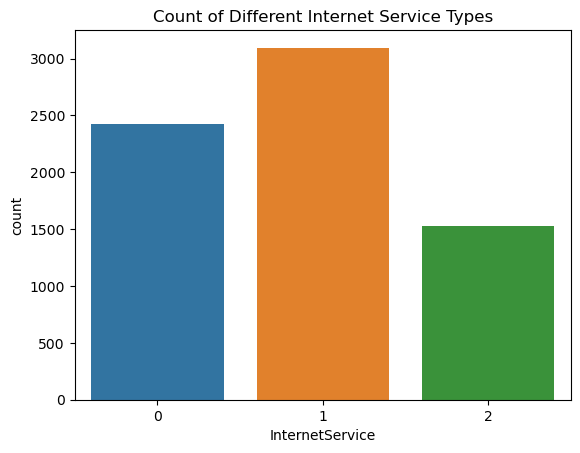

In [30]:
sns.countplot(x='Churn', data=df)
plt.title("Count of Churned vs Non-Churned Customers")
plt.show()

sns.countplot(x='InternetService', data=df)
plt.title("Count of Different Internet Service Types")
plt.show()


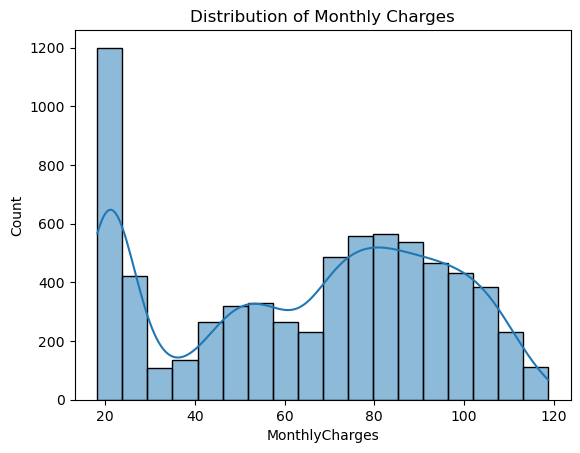

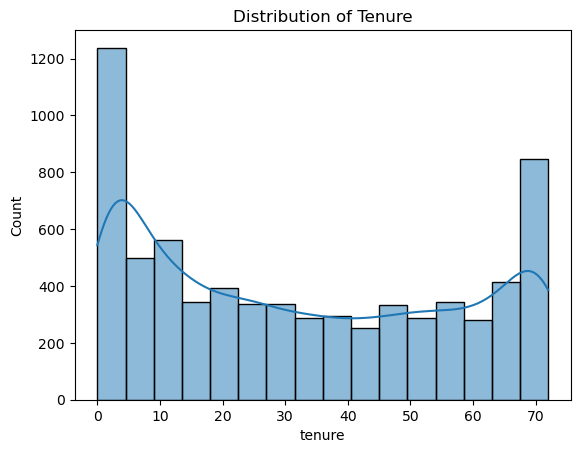

In [31]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()

sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Tenure")
plt.show()


## Bivariate Analysis

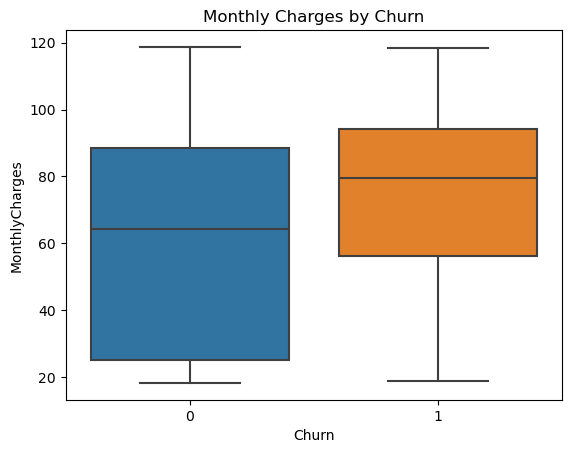

In [33]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()


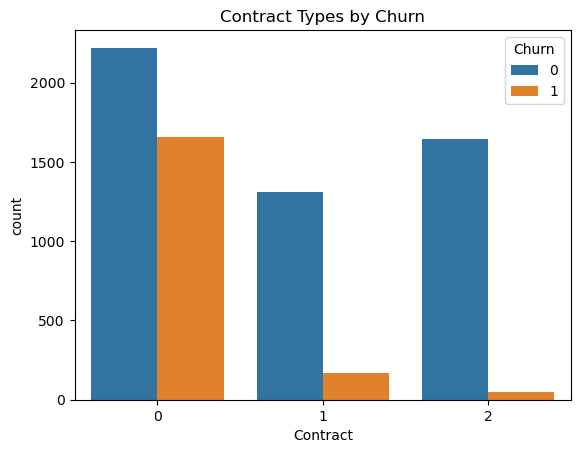

In [34]:
df['Contract'] = df['Contract'].astype(str)
df['Churn'] = df['Churn'].astype(str)


sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Types by Churn")
plt.show()


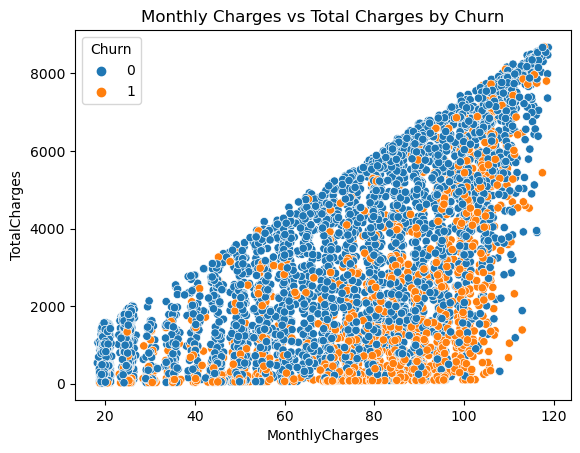

In [35]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title("Monthly Charges vs Total Charges by Churn")
plt.show()


## Multivariate Analysis

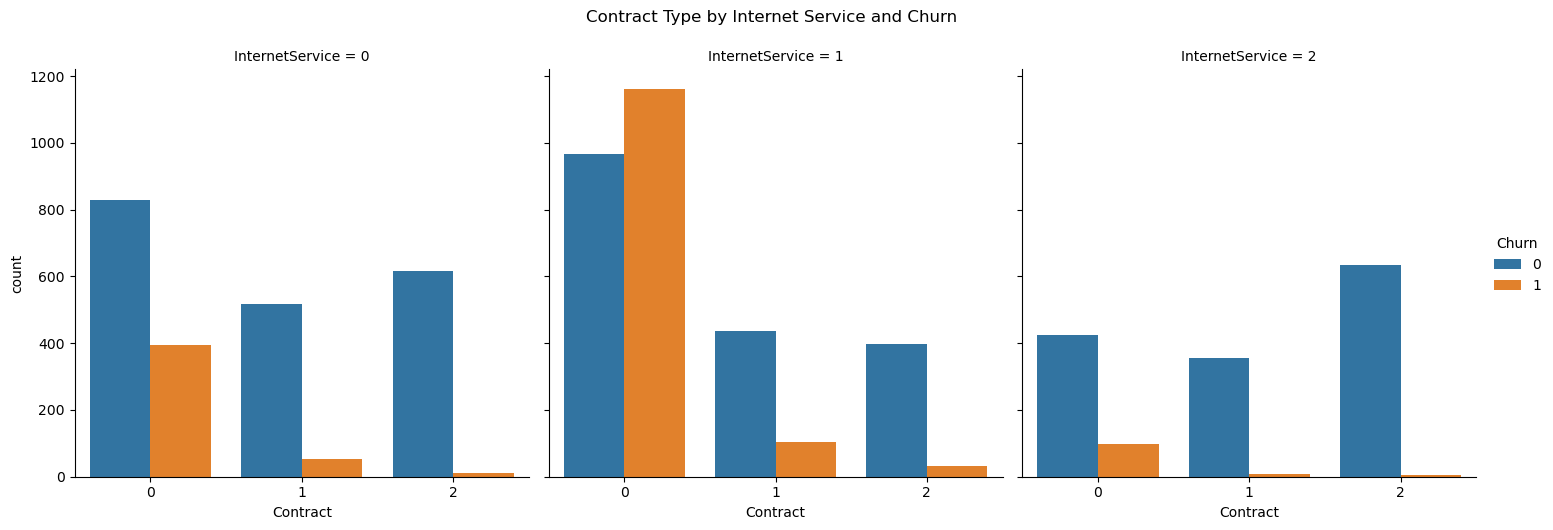

In [37]:
# Convert columns to string types 
df['Contract'] = df['Contract'].astype(str)
df['Churn'] = df['Churn'].astype(str)
df['InternetService'] = df['InternetService'].astype(str)

sns.catplot(x='Contract', hue='Churn', col='InternetService', kind='count', data=df)
plt.suptitle("Contract Type by Internet Service and Churn", y=1.05)
plt.show()


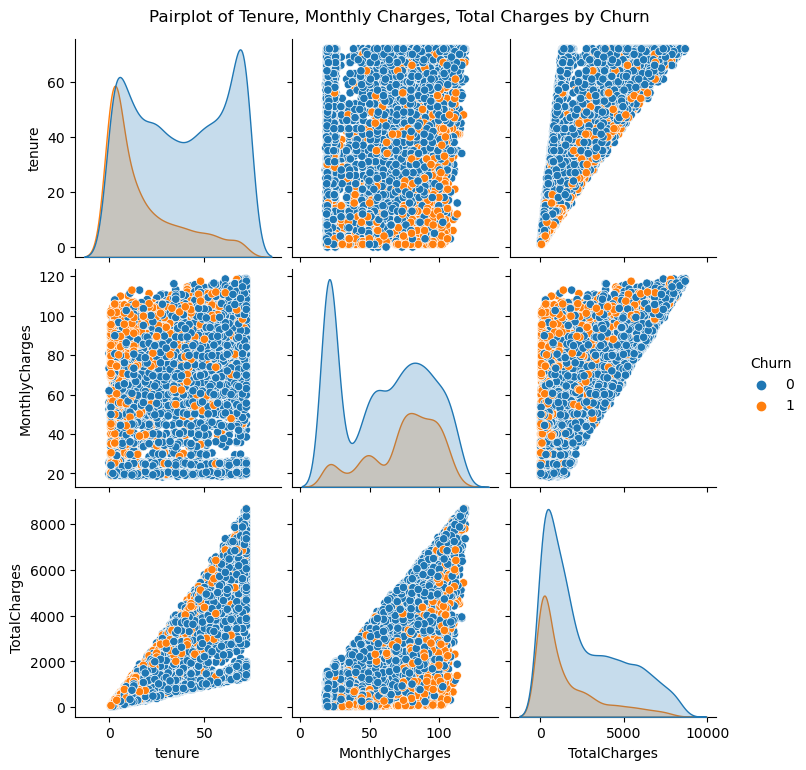

In [38]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.suptitle("Pairplot of Tenure, Monthly Charges, Total Charges by Churn", y=1.02)
plt.show()


## Feature Scaling:

### Standardize or normalize numerical features for model accuracy.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
features[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(features[['MonthlyCharges', 'TotalCharges', 'tenure']])


In [42]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193


In [43]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [44]:
train_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,-0.463037,1,0,0,2,0,2,0,0,2,1,0,3,0.002935,-0.417911
1623,0,0,0,0,0.880735,1,2,1,0,2,0,0,2,2,2,1,0,1.078118,1.256667
6074,1,0,1,0,-1.277445,0,1,0,0,0,0,0,0,0,0,1,2,-1.373033,-0.997797
1362,1,0,0,0,-1.155283,1,0,1,0,0,0,0,0,0,0,1,2,0.180747,-0.903088
6754,1,0,0,1,-1.318165,1,2,0,2,2,0,2,0,0,2,1,0,-0.095111,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,-1.277445,1,0,1,2,0,0,0,2,2,0,1,2,1.004999,-0.966206
5191,0,0,1,1,-0.381597,1,2,0,2,2,2,2,2,2,2,1,1,0.875378,-0.037530
5226,1,0,1,1,-0.829521,1,0,2,1,1,1,1,1,1,0,1,2,-1.449476,-0.873020
5390,1,1,0,0,-0.829521,1,2,1,0,0,2,0,2,2,0,1,2,1.152899,-0.478246


In [45]:
test_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,-1.277445,0,1,0,0,0,0,0,0,0,0,1,2,-1.328164,-0.997201
2715,1,0,0,0,0.351370,1,2,2,1,1,1,1,1,1,0,1,0,-1.313208,-0.568186
3825,0,0,1,1,0.799294,1,0,2,1,1,1,1,1,1,2,0,3,-1.509300,-0.552622
1807,0,0,0,0,-1.277445,1,0,1,0,0,2,0,0,0,0,0,2,0.385148,-0.974440
132,1,0,0,0,1.410099,1,0,0,0,0,0,2,0,0,2,0,0,-0.472339,0.431289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,1.287938,1,0,0,0,2,2,2,0,2,2,1,3,0.117599,0.925231
315,1,0,1,1,0.758574,1,2,1,2,2,0,2,2,2,1,0,1,1.505199,1.502579
2439,1,0,1,1,-0.625919,1,0,2,1,1,1,1,1,1,1,0,0,-1.491021,-0.862556
5002,0,0,1,1,1.491540,0,1,0,2,0,2,0,0,2,2,1,1,-0.691696,0.298829


In [46]:
Xtrain, Xtest,ytrain, ytest = train_test_split(features, target, test_size = 0.2, random_state = 42)

## Model Training

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
#initialize
model = LogisticRegression(random_state = 42 )


In [50]:
print("Xtrain missing values:", Xtrain.isnull().sum().sum())
print("ytrain missing values:", ytrain.isnull().sum().sum())


Xtrain missing values: 0
ytrain missing values: 0


In [51]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on Xtrain, and transform Xtest
Xtrain = imputer.fit_transform(Xtrain)
Xtest = imputer.transform(Xtest)


In [52]:
#import numpy as np

#print("Xtrain missing values after imputation:", np.isnan(Xtrain).sum())


In [53]:
# Train the model
model.fit(Xtrain, ytrain)

LogisticRegression(random_state=42)

In [54]:
predictions =model.predict(Xtest)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
report = classification_report(ytest, predictions, digits=4)
matrix = confusion_matrix(ytest, predictions)

In [57]:
print(report)

              precision    recall  f1-score   support

           0     0.8569    0.9015    0.8786      1036
           1     0.6803    0.5818    0.6272       373

    accuracy                         0.8169      1409
   macro avg     0.7686    0.7417    0.7529      1409
weighted avg     0.8101    0.8169    0.8121      1409



In [58]:
len(ytest)

1409

<Axes: >

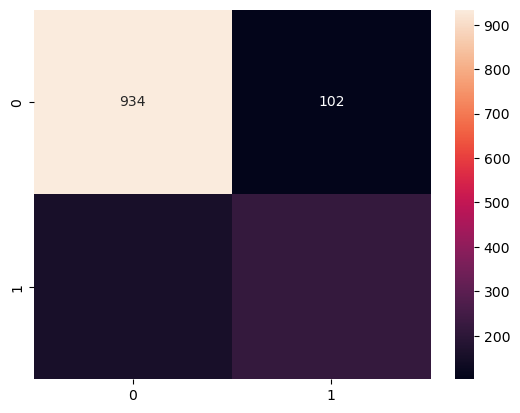

In [59]:
sns.heatmap(matrix, annot = True, fmt = 'g')

 ## Improving the model performance

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Uniform distribution <===> MinMaxScaler
# Normal distribution <===> StandardScaler

In [62]:
scaler = MinMaxScaler()


In [63]:
Xtrain_scaled = scaler.fit_transform(Xtrain)

In [64]:
Xtest_scaled = scaler.transform(Xtest)

In [65]:
#initialize
model = LogisticRegression(random_state = 42 )

In [66]:
# Train the model
model.fit(Xtrain_scaled, ytrain)

LogisticRegression(random_state=42)

In [67]:
predictions = model.predict(Xtest_scaled)

In [68]:
report = classification_report(ytest, predictions, digits=4)

In [69]:
print(report)

              precision    recall  f1-score   support

           0     0.8561    0.9015    0.8782      1036
           1     0.6792    0.5791    0.6252       373

    accuracy                         0.8162      1409
   macro avg     0.7677    0.7403    0.7517      1409
weighted avg     0.8093    0.8162    0.8112      1409



<Axes: >

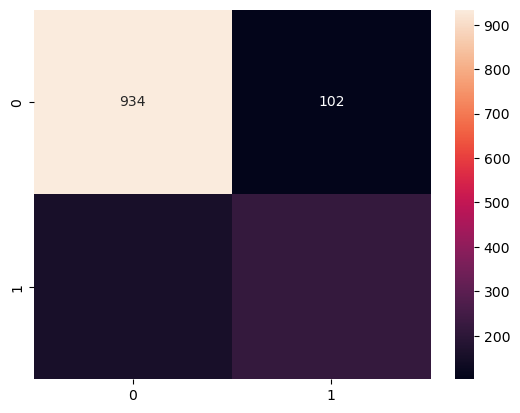

In [70]:
matrix = confusion_matrix(ytest, predictions)
sns.heatmap(matrix, annot = True, fmt = 'g')

## Improving the model from the model side

              precision    recall  f1-score   support

           0     0.9452    0.6332    0.7584      1036
           1     0.4685    0.8981    0.6158       373

    accuracy                         0.7033      1409
   macro avg     0.7069    0.7657    0.6871      1409
weighted avg     0.8190    0.7033    0.7206      1409



<Axes: >

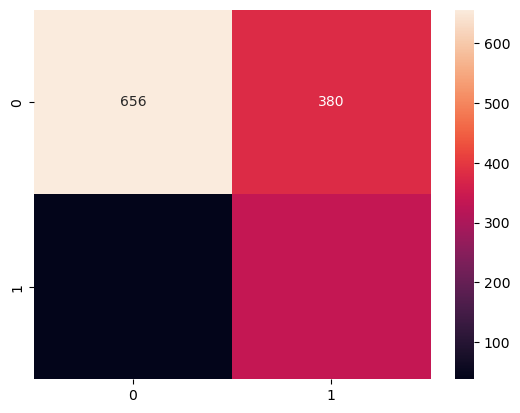

In [72]:
#initialize
model = LogisticRegression(random_state = 42, class_weight = {0:1, 1:4} )
# Train the model
model.fit(Xtrain_scaled, ytrain)
predictions = model.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=4)
matrix = confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot = True, fmt = 'g')

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
classifiers = [
    [LogisticRegression(random_state = 42, class_weight = {0:1, 1:4}), "Logistic Regression"],
    [SGDClassifier(random_state = 42, class_weight = {0:1, 1:4}), "SGD Classifier"],
    [DecisionTreeClassifier(random_state = 42, class_weight = {0:1, 1:4}), "Decision Tree"],
    [RandomForestClassifier(random_state = 42, class_weight = {0:1, 1:4}), "Random Forest"],
]


In [75]:
classifiers[0]

[LogisticRegression(class_weight={0: 1, 1: 4}, random_state=42),
 'Logistic Regression']

<-- Logistic Regression-->
              precision    recall  f1-score   support

           0     0.9452    0.6332    0.7584      1036
           1     0.4685    0.8981    0.6158       373

    accuracy                         0.7033      1409
   macro avg     0.7069    0.7657    0.6871      1409
weighted avg     0.8190    0.7033    0.7206      1409



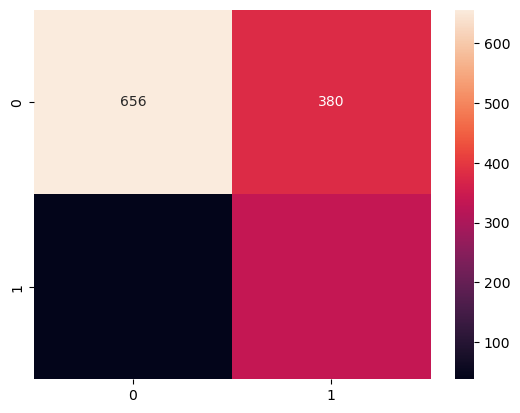

<-- SGD Classifier-->
              precision    recall  f1-score   support

           0     0.8949    0.7886    0.8384      1036
           1     0.5585    0.7426    0.6375       373

    accuracy                         0.7764      1409
   macro avg     0.7267    0.7656    0.7379      1409
weighted avg     0.8058    0.7764    0.7852      1409



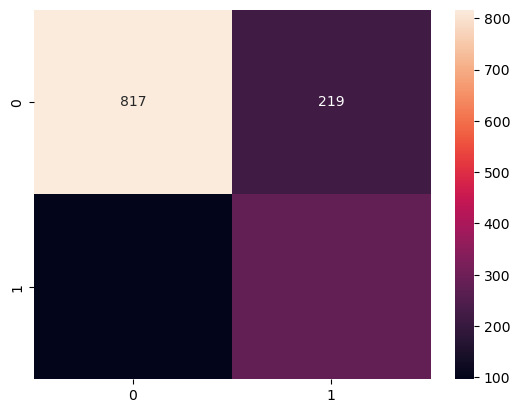

<-- Decision Tree-->
              precision    recall  f1-score   support

           0     0.8117    0.8156    0.8137      1036
           1     0.4810    0.4745    0.4777       373

    accuracy                         0.7253      1409
   macro avg     0.6463    0.6451    0.6457      1409
weighted avg     0.7242    0.7253    0.7247      1409



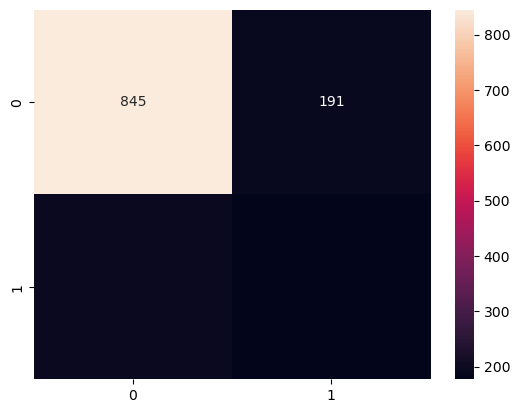

<-- Random Forest-->
              precision    recall  f1-score   support

           0     0.8235    0.9189    0.8686      1036
           1     0.6680    0.4531    0.5399       373

    accuracy                         0.7956      1409
   macro avg     0.7458    0.6860    0.7043      1409
weighted avg     0.7824    0.7956    0.7816      1409



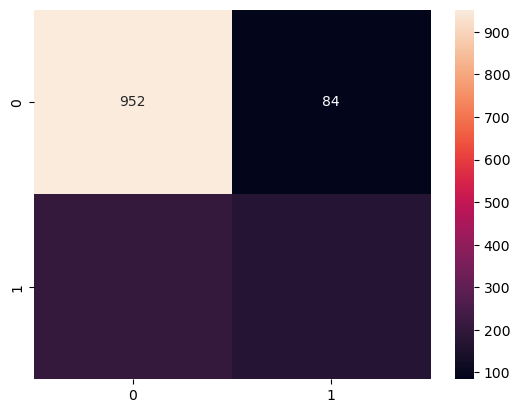

In [76]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<-- {model_name}-->")
    model.fit(Xtrain_scaled, ytrain)
    predictions = model.predict(Xtest_scaled)
    report = classification_report(ytest, predictions, digits=4)
    matrix = confusion_matrix(ytest, predictions)
    print(report)
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.show()

In [77]:
# Display the first few rows
print(Xtrain[:5])


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  -4.63037309e-01  1.00000000e+00  0.00000000e+00  0.00000000e+00
   2.00000000e+00  0.00000000e+00  2.00000000e+00  0.00000000e+00
   0.00000000e+00  2.00000000e+00  1.00000000e+00  0.00000000e+00
   3.00000000e+00  2.93498408e-03 -4.17910611e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.80734693e-01  1.00000000e+00  2.00000000e+00  1.00000000e+00
   0.00000000e+00  2.00000000e+00  0.00000000e+00  0.00000000e+00
   2.00000000e+00  2.00000000e+00  2.00000000e+00  1.00000000e+00
   0.00000000e+00  1.07811764e+00  1.25666725e+00]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -1.27744458e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   2.00000000e+00 -1.37303293e+00 -9.97797189e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

## Feature Importance

In [79]:
classifiers[3][0]

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [80]:
classifiers[3][0].feature_importances_

array([0.02513214, 0.01636025, 0.02147176, 0.01961719, 0.15265871,
       0.00614654, 0.02082493, 0.03019043, 0.0604754 , 0.02622325,
       0.02086338, 0.0491893 , 0.01731595, 0.01693744, 0.11493279,
       0.02445622, 0.04870021, 0.15998806, 0.16851606])

In [81]:
Xtrain_df = pd.DataFrame(Xtrain, columns=features.columns)
Xtest_df = pd.DataFrame(Xtest, columns=features.columns)


Xtrain_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,1.0,-0.463037,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,0.002935,-0.417911
1,0.0,0.0,0.0,0.0,0.880735,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,1.078118,1.256667
2,1.0,0.0,1.0,0.0,-1.277445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.373033,-0.997797
3,1.0,0.0,0.0,0.0,-1.155283,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.180747,-0.903088
4,1.0,0.0,0.0,1.0,-1.318165,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,-0.095111,0.000000


In [82]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193


In [83]:
Xtrain_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [84]:
features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [85]:
feature_names = Xtrain_df.columns

In [86]:
importances = classifiers[3][0].feature_importances_

In [87]:
feature_importance_df =pd.DataFrame({"Features":feature_names, "Importance":importances})

In [88]:
feature_importance_df

,Features,Importance
0,gender,0.025132
1,SeniorCitizen,0.016360
2,Partner,0.021472
3,Dependents,0.019617
4,tenure,0.152659
5,PhoneService,0.006147
6,MultipleLines,0.020825
7,InternetService,0.030190
8,OnlineSecurity,0.060475
9,OnlineBackup,0.026223


In [89]:
feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending = False)

In [90]:
feature_importance_df

,Features,Importance
18,TotalCharges,0.168516
17,MonthlyCharges,0.159988
4,tenure,0.152659
14,Contract,0.114933
8,OnlineSecurity,0.060475
11,TechSupport,0.049189
16,PaymentMethod,0.048700
7,InternetService,0.030190
9,OnlineBackup,0.026223
0,gender,0.025132


<Axes: xlabel='Importance', ylabel='Features'>

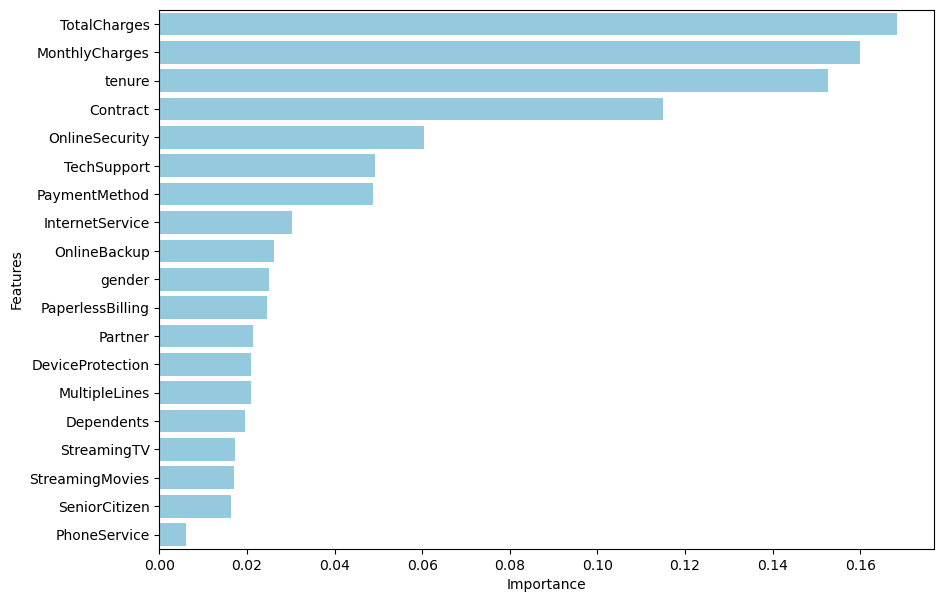

In [91]:
plt.figure(figsize=(10, 7))
sns.barplot(x= "Importance", y= "Features", data = feature_importance_df, color = "skyblue")

### Top 5 features

In [93]:
top_5_feats = list(feature_importance_df[:5]["Features"].values)

In [94]:
top_5_feats

['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'OnlineSecurity']

In [95]:
Xtrain_top_5 = Xtrain_df[top_5_feats]
Xtest_top_5 = Xtest_df[top_5_feats]

In [96]:
Xtrain_top_5

,TotalCharges,MonthlyCharges,tenure,Contract,OnlineSecurity
0,-0.417911,0.002935,-0.463037,1.0,2.0
1,1.256667,1.078118,0.880735,2.0,0.0
2,-0.997797,-1.373033,-1.277445,0.0,0.0
3,-0.903088,0.180747,-1.155283,0.0,0.0
4,0.000000,-0.095111,-1.318165,2.0,2.0
...,...,...,...,...,...
5629,-0.966206,1.004999,-1.277445,0.0,2.0
5630,-0.037530,0.875378,-0.381597,2.0,2.0
5631,-0.873020,-1.449476,-0.829521,0.0,1.0
5632,-0.478246,1.152899,-0.829521,0.0,0.0


<-- Logistic Regression-->
              precision    recall  f1-score   support

           0     0.9567    0.5965    0.7348      1036
           1     0.4522    0.9249    0.6074       373

    accuracy                         0.6835      1409
   macro avg     0.7044    0.7607    0.6711      1409
weighted avg     0.8231    0.6835    0.7011      1409



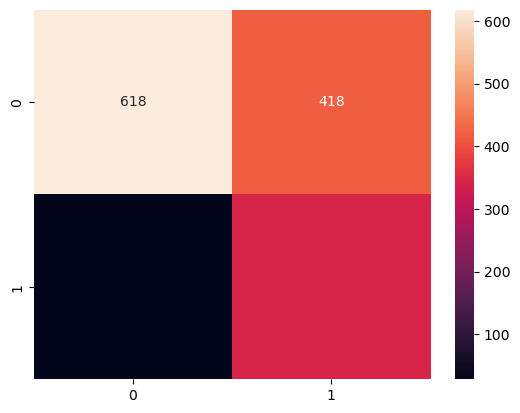

<-- SGD Classifier-->
              precision    recall  f1-score   support

           0     0.9072    0.7268    0.8071      1036
           1     0.5112    0.7936    0.6218       373

    accuracy                         0.7445      1409
   macro avg     0.7092    0.7602    0.7145      1409
weighted avg     0.8024    0.7445    0.7580      1409



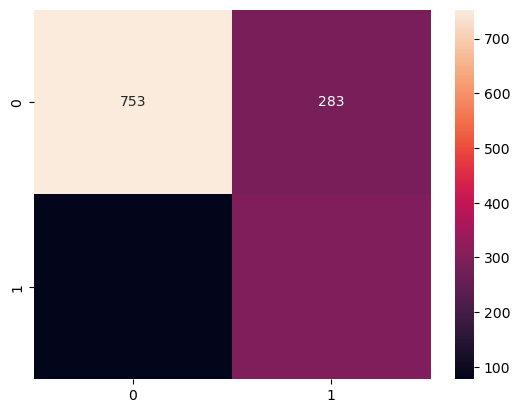

<-- Decision Tree-->
              precision    recall  f1-score   support

           0     0.8186    0.8147    0.8166      1036
           1     0.4921    0.4987    0.4953       373

    accuracy                         0.7310      1409
   macro avg     0.6553    0.6567    0.6560      1409
weighted avg     0.7322    0.7310    0.7316      1409



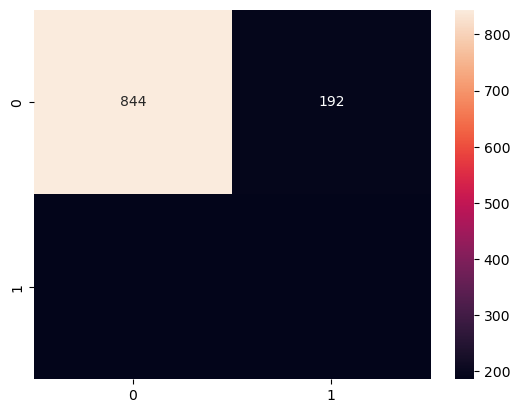

<-- Random Forest-->
              precision    recall  f1-score   support

           0     0.8220    0.8736    0.8470      1036
           1     0.5747    0.4745    0.5198       373

    accuracy                         0.7679      1409
   macro avg     0.6983    0.6740    0.6834      1409
weighted avg     0.7565    0.7679    0.7604      1409



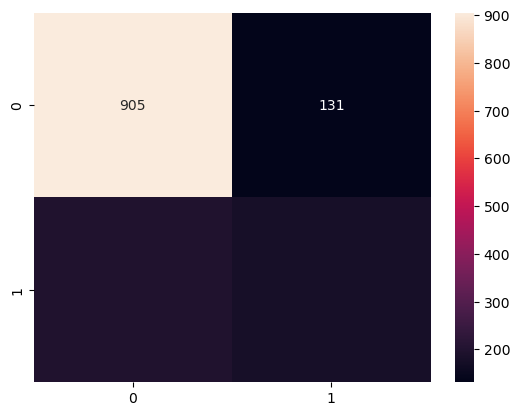

In [97]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<-- {model_name}-->")
    model.fit(Xtrain_top_5, ytrain)
    predictions = model.predict(Xtest_top_5)
    report = classification_report(ytest, predictions, digits=4)
    matrix = confusion_matrix(ytest, predictions)
    print(report)
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.show()